In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#%matplotlib inline

import pandas as pd

Dataset [Automobiles](https://archive.ics.uci.edu/dataset/10/automobile)

In [ ]:
Data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [ ]:
#pd.set_option('display.max_columns', None)

In [ ]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
Data.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     4
dtype: int64

Sometimes, absence of the information is a very important information, e.g., missing SSN can indicate that the person is a foreigner. In this case, we create a separate category for nans.

In [ ]:
#Data[Data.columns[(Data.dtypes == "object").values]].fillna("")
Data.dropna(subset=Data.columns[Data.columns != 1], inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
Data[1] = imputer.fit_transform(Data[[1]])

In [ ]:
y = Data.iloc[:,-1]
X = Data.iloc[:,:-1] #Data.drop(Data.columns[-1], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
               X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
transform = ColumnTransformer([('OneHot', OneHotEncoder(drop='first', handle_unknown='ignore'),
                                X_train.columns[(X_train.dtypes == "object")].values)], remainder='passthrough')

In [ ]:
transform.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 array([ 2,  3,  4,  5,  6,  7,  8, 14, 15, 17]))])

In [ ]:
pd.DataFrame(transform.transform(X_train), columns=transform.get_feature_names_out()).head()

,OneHot__x2_audi,OneHot__x2_bmw,OneHot__x2_chevrolet,OneHot__x2_dodge,OneHot__x2_honda,OneHot__x2_jaguar,OneHot__x2_mazda,OneHot__x2_mercedes-benz,OneHot__x2_mitsubishi,OneHot__x2_nissan,...,remainder__x12,remainder__x13,remainder__x16,remainder__x18,remainder__x19,remainder__x20,remainder__x21,remainder__x22,remainder__x23,remainder__x24
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.34,3.46,8.5,88.0,5000.0,24.0,30.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2758.0,121.0,3.54,3.07,9.3,110.0,5250.0,21.0,28.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,54.5,1951.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49.7,3071.0,181.0,3.43,3.27,9.0,160.0,5200.0,19.0,25.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0


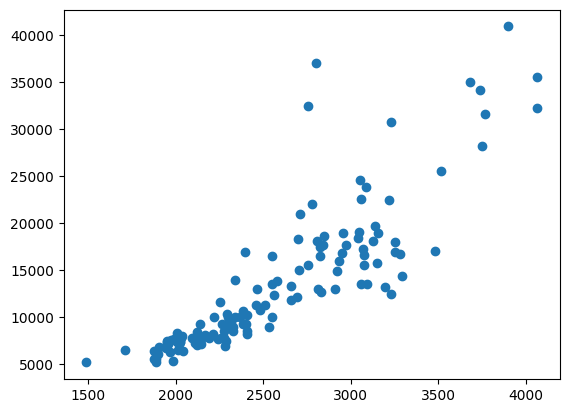

In [ ]:
plt.scatter(X_train[13],y_train)  #23 sqrt

In [ ]:
y_target=y.values

In [ ]:
#Xm=np.vstack((np.ones(len(X)),X[13].values,X[13].values**2,X[13].values**3)).T
Xm=np.vstack((np.ones(len(X)),X[13].values)).T

In [ ]:
[w0,w1]=(np.linalg.inv(Xm.T@Xm)@Xm.T).dot(y_target)
w0,w1

(-19578.13476142775, 12.829615832958554)

In [ ]:
x = np.linspace(1500,4000,100)
y_pred = w0+w1*x

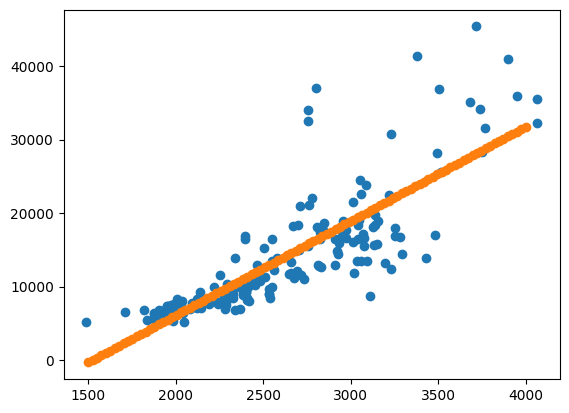

In [ ]:
plt.scatter(X[13],y_target)
plt.scatter(x,y_pred)

In [ ]:
def plot_3d_GD(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Visualize fun on [a, b] x [c, d]

    Optional - line on the surface
    trace : np.array N x 2 - coordinates of the path
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y_ = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y_, alpha=0.6)
    ax.contour(x1, x2, y_, zdir='z',
                  offset=y_.min(), cmap=cm.coolwarm)

    # Plot 3d line
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.plot(trace[:, 0], trace[:, 1], "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y_.min(), y_.max())

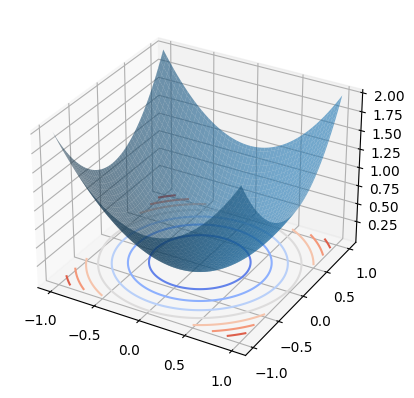

In [ ]:
plot_3d_GD(lambda x1,x2: x1**2+x2**2)

In [ ]:
#y = np.log(y)
# Xm = np.vstack((np.ones(len(X)),(X[13].values - X[13].values.mean())/X[13].values.std())).T
# [w0,w1]=(np.linalg.inv(Xm.T@Xm)@Xm.T).dot(y)
# w0,w1

In [ ]:
class grad_descend():
    """
    * grad_fun - gradient
    * step_size - learing rate
    * num_steps - number if iterations

    Returns np.array (num_steps+1) x 2,
    the first element is the random initialization
    """
    def __init__(self, Xm, y):
        self.X = Xm
        self.y = y
        #self.step_size=step_size
        #self.num_steps=num_steps
    def grad_loss(self,w1, w2):
        w = np.array([w1,w2])
        return 2*self.X.T.dot(self.X.dot(w)-self.y)/len(self.y)
    def loss(self, w1, w2):
        w = np.array([w1,w2])
        y_ = self.y.copy()
        for i in range(len(w.shape)-1):
            y_ = np.expand_dims(y_, axis=i+1)
        return np.mean(np.power(np.tensordot(self.X,w, axes=(1,0)) - y_, 2), axis=0)
    def gd(self, x0, step_size=0.2, num_steps=20):
        n_features = 2
        d = [x0]
        for i in range(num_steps):
            d.append(d[i]-step_size*self.grad_loss(d[i][0],d[i][1]))
        return np.array(d)

In [ ]:
def plot_gradient(w_list, a=-1, b=1, c=-1, d=1, title=''):
    A, B = np.meshgrid(np.linspace(a, b, 100), np.linspace(c, d, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = GD.loss(A[i, j], B[i, j])

    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
    plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)

    # visualize trajectory
    plt.scatter(w0, w1, c='r')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [ ]:
GD = grad_descend(Xm,y_target)

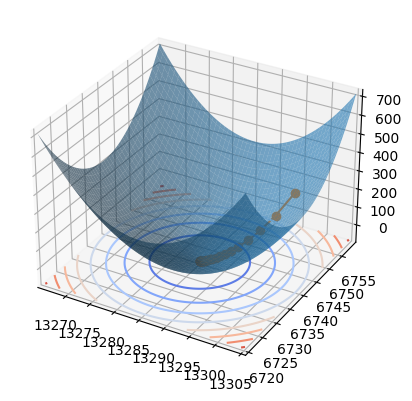

In [ ]:
#x0 = np.array([w0,w1])+ np.random.uniform(-200, 200, 2)
x0 = np.array([w0,w1])+ np.random.uniform(-20, 20, 2)
trace = GD.gd(x0, 0.1,25) # grad_descend(grad_loss, Xm, y, 0.1, 20)
dist = 20 #200
a, b, c, d = w0-dist, w0+dist, w1-dist, w1+dist
plot_3d_GD(GD.loss, a, b, c, d, trace=trace)

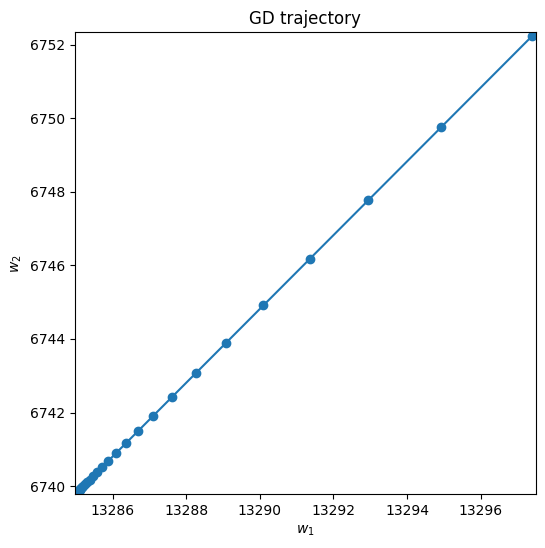

In [ ]:
plot_gradient(trace, a, b, c, d, title='GD trajectory')

In [ ]:
from sklearn.linear_model import SGDRegressor
#from sklearn.pipeline import make_pipeline

In [ ]:
reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="constant", eta0=0.0001,  penalty='elasticnet', l1_ratio=0, alpha=0.2) #make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
reg.fit(X_train[[13]],y_train)

SGDRegressor(alpha=0.2, eta0=0.0001, l1_ratio=0, learning_rate='constant',
             penalty='elasticnet')

In [ ]:
reg.intercept_, reg.coef_

(array([1.94827812e+08]), array([-6.897269e+10]))

In [ ]:
y_pred = reg.predict(X_test[[13]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

3.187501604520378e+28

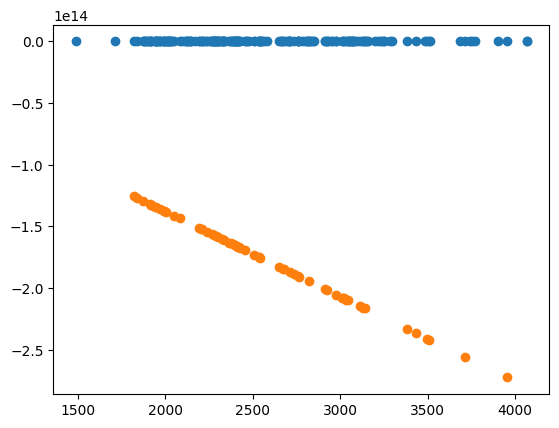

In [ ]:
plt.scatter(X[13],y)
plt.scatter(X_test[13],y_pred)

In [ ]:
sc = StandardScaler()

In [ ]:
reg.fit(sc.fit_transform(X_train[[13]]),y_train)

SGDRegressor(alpha=0.2, eta0=0.0001, l1_ratio=0, learning_rate='constant',
             penalty='elasticnet')

In [ ]:
reg.intercept_, reg.coef_

(array([13354.29566869]), array([5432.42070104]))

In [ ]:
y_pred = reg.predict(sc.fit_transform(X_test[[13]]))

In [ ]:
mean_squared_error(y_test, y_pred)

30697465.95075243

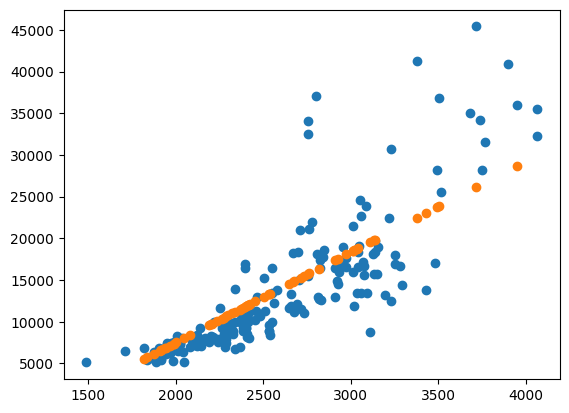

In [ ]:
plt.scatter(X[13],y)
plt.scatter(X_test[13],y_pred)

In [ ]:
train_acc = []
test_acc = []
X_train_t = transform.fit_transform(X_train)
X_test_t = transform.transform(X_test)
reg = SGDRegressor(max_iter=1, warm_start=True,  tol=0,
                       penalty=None,  random_state=42)
for epoc in range(1,1800):
  #reg = SGDRegressor(max_iter=epoc, tol=-np.infty)
  reg.fit(sc.fit_transform(X_train_t),y_train)
  train_acc.append(mean_squared_error(y_train, reg.predict(sc.fit_transform(X_train_t))))
  test_acc.append(mean_squared_error(y_test, reg.predict(sc.fit_transform(X_test_t))))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_

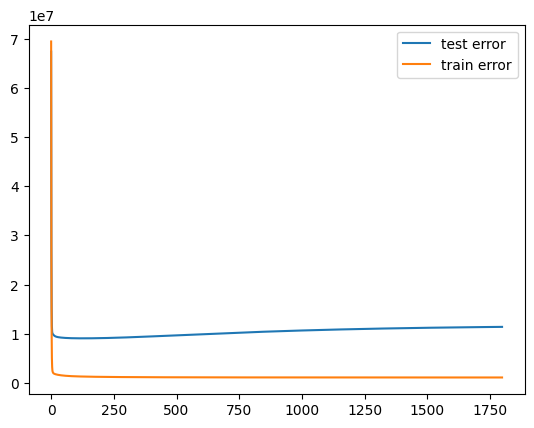

In [ ]:
plt.plot(test_acc, label='test error')
plt.plot(train_acc, label='train error')
plt.legend()